In [6]:
import os
import logging
import statistics

import pandas as pd
import matplotlib.pyplot as plt

import gym

gym.undo_logger_setup()  # NOQA
from chainer import functions as F
from chainer import links as L
from chainer import optimizers
import numpy as np

import chainerrl
from chainerrl.action_value import DiscreteActionValue
from chainerrl import agents
from chainerrl import experiments
from chainerrl import explorers
from chainerrl import links
from chainerrl import misc
from chainerrl.q_functions import DuelingDQN
from chainerrl import replay_buffer

import atari_wrappers

/Users/sykwer/work/i18-sykwer/visualize_atari/venv/lib/python3.7/site-packages/gym/__init__.py:15: UserWarning: gym.undo_logger_setup is deprecated. gym no longer modifies the global logging configuration
  warnings.warn("gym.undo_logger_setup is deprecated. gym no longer modifies the global logging configuration")


In [7]:
random_seed = 1
outdir = "results"
env_name = "BreakoutNoFrameskip-v4"
load_dir = "../visualize_atari/results/211288/20180804T155228.325999/10000000_finish"

In [8]:
def make_env():
    env = atari_wrappers.wrap_deepmind(
        atari_wrappers.make_atari(env_name),
        episode_life=False, clip_rewards=False
    )
    env.seed(random_seed)
    # misc.env_modifiers.make_rendered(env)
    return env
env = make_env()

In [9]:
print("observation space shape: {}".format(env.observation_space.shape))
print("action size: {}".format(env.action_space.n))

observation space shape: (4, 84, 84)
action size: 4


In [10]:
q_func = links.Sequence(
    links.NatureDQNHead(activation=F.relu),
    L.Linear(512, env.action_space.n),
    DiscreteActionValue,
)
opt = optimizers.RMSpropGraves(lr=2.5e-4, alpha=0.95, momentum=0.0, eps=1e-2)
opt.setup(q_func)
rep_buf = replay_buffer.ReplayBuffer(10 ** 6)
explorer = explorers.LinearDecayEpsilonGreedy(
    1,0, 0.1, 10 ** 6, lambda: np.random.randint(env.action_space.n),
)

In [11]:
agent = agents.DQN(q_func, opt, rep_buf, gpu=-1, gamma=0.99, explorer=explorer, replay_start_size=5 * 10**4,
           target_update_interval=10**4, clip_delta=True, update_interval=4, batch_accumulator="sum",
            phi=lambda x: np.asarray(x, np.float32) / 255)
agent.load(load_dir)

In [12]:
qvalue_list1 = []
qvalue_list2 = []
qvalue_list3 = []
qvalue_list4 = []
image_list = []
action_list = []

obs = env.reset()
done = False
test_r = 0
t = 0

while not (done or t == 1800): # max_episode_len
    image_list.append(env.render(mode="rgb_array"))
    
    qvalues = agent.model(agent.batch_states([np.asarray(obs)], agent.xp, agent.phi)).q_values.data[0]
    qvalue_list1.append(qvalues[0])
    qvalue_list2.append(qvalues[1])
    qvalue_list3.append(qvalues[2])
    qvalue_list4.append(qvalues[3])
    
    a = agent.act(obs)
    action_list.append(a)
    
    obs, r, done, info = env.step(a)
    test_r += r
    t += 1

agent.stop_episode()
print("episode reward: {}".format(test_r))

WARN: <class 'atari_wrappers.FrameStack'> doesn't implement 'reset' method, but it implements deprecated '_reset' method.
episode reward: 379.0


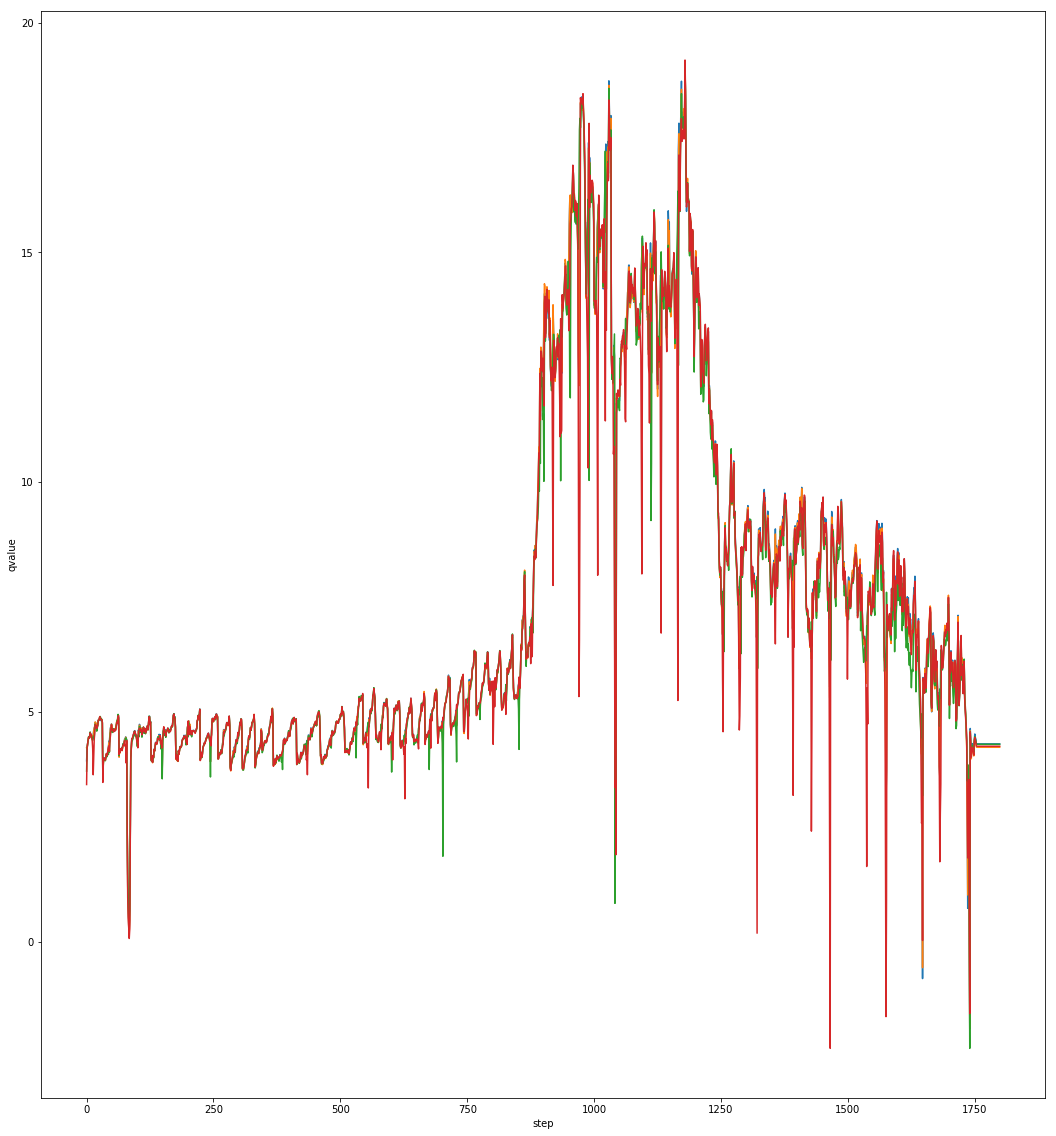

In [13]:
fig = plt.figure(figsize=[18, 20])
axis = fig.add_subplot(111)

step_idxs = np.arange(0, len(qvalue_list1), 1)

axis.plot(step_idxs, qvalue_list1)
axis.plot(step_idxs, qvalue_list2)
axis.plot(step_idxs, qvalue_list3)
axis.plot(step_idxs, qvalue_list4)

axis.set_xlabel("step")
axis.set_ylabel("qvalue")

plt.show()

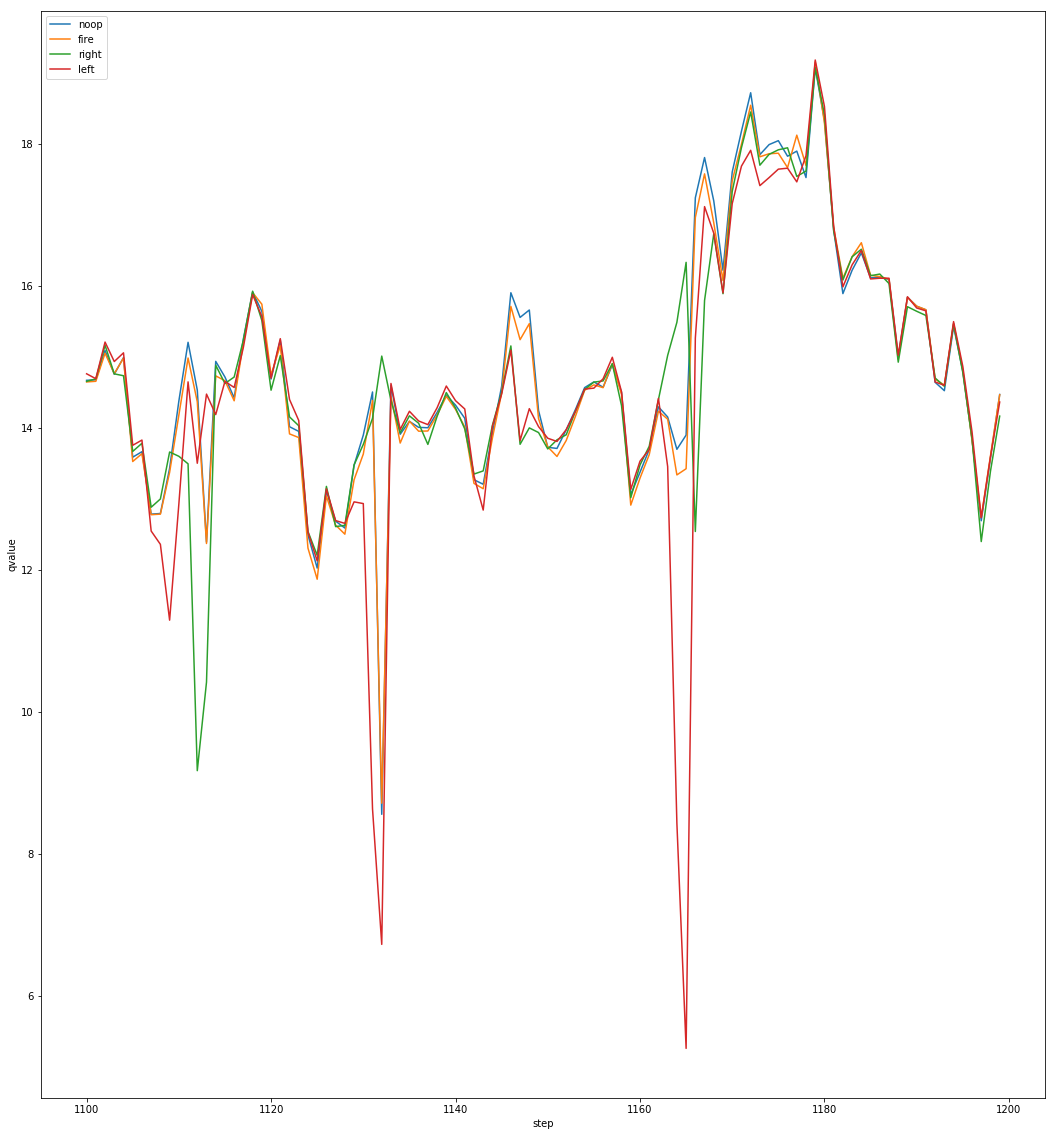

In [14]:
fig = plt.figure(figsize=[18, 20])
axis = fig.add_subplot(111)

step_idxs = np.arange(1100, 1200, 1)

axis.plot(step_idxs, qvalue_list1[1100:1200], label="noop")
axis.plot(step_idxs, qvalue_list2[1100:1200], label="fire")
axis.plot(step_idxs, qvalue_list3[1100:1200], label="right")
axis.plot(step_idxs, qvalue_list4[1100:1200], label="left")

axis.set_xlabel("step")
axis.set_ylabel("qvalue")
axis.legend(loc="upper left")

plt.show()

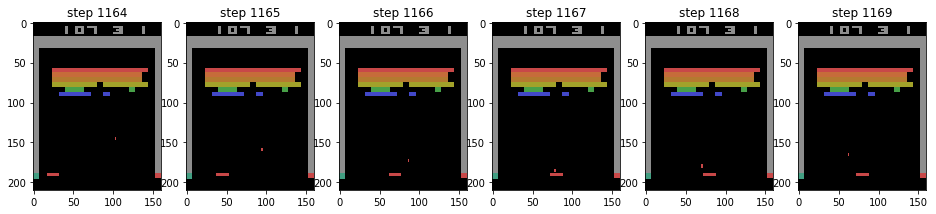

In [16]:
fig = plt.figure(figsize=[16, 12])
j = 1
for i in range(1164, 1170):
    ax = fig.add_subplot("16{}".format(j))
    j += 1
    
    ax.imshow(image_list[i])
    ax.set_title("step {}".format(i))
plt.show()

グラフの上にカーソルを当てると, 対応するステップのrenderされた画像と, 詳細なaction-value値が表示される.
どれかのactionをゼロにして, 相対表示するのがよいかも. 区間指定したら, saliency-mapの動画を生成する.

In [17]:
qvalue_list1

[3.94403,
 4.2330327,
 4.318252,
 4.3863144,
 4.459029,
 4.443423,
 4.4504585,
 4.5596375,
 4.516367,
 4.51758,
 4.465985,
 4.446275,
 4.4909697,
 4.482471,
 4.60301,
 4.656459,
 4.6873083,
 4.7804976,
 4.7611685,
 4.755421,
 4.6513195,
 4.6833963,
 4.7266474,
 4.831332,
 4.8294764,
 4.851716,
 4.90163,
 4.8799734,
 4.8185635,
 4.826613,
 4.831867,
 4.7598467,
 3.5725603,
 3.9346023,
 4.0088315,
 4.007217,
 3.992319,
 3.9738667,
 4.0443506,
 4.095984,
 4.0811276,
 4.1091366,
 4.177647,
 4.2397614,
 4.3728065,
 4.353445,
 4.550371,
 4.6655645,
 4.678624,
 4.7471614,
 4.700873,
 4.578479,
 4.6230173,
 4.5869865,
 4.6123652,
 4.5929785,
 4.6422253,
 4.626764,
 4.684,
 4.7480946,
 4.7870502,
 4.758963,
 4.891856,
 4.8816576,
 4.0781574,
 4.1996145,
 4.1319356,
 4.207245,
 4.190545,
 4.2240305,
 4.1871004,
 4.266618,
 4.3125668,
 4.311064,
 4.3593903,
 4.4178634,
 4.4209547,
 4.4649067,
 4.431878,
 4.3949165,
 2.439839,
 1.2300863,
 0.78253126,
 0.35772014,
 0.2864771,
 0.49307227,
 2.18690